In [1]:
import pandas as pd
import pickle
import numpy as np
%pylab
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [21]:
import sys
sys.path.append('../')

## Dataset

In [99]:
df = pd.read_pickle("../dataset/dataframes/voxc1/si_voxc_dataframe.pkl")

In [100]:
target_speakers = df.spk.value_counts()[4:15].index.tolist()
target_speakers

['Peter_Jackson',
 'Louis_C.K.',
 'Vince_Gilligan',
 'J.J._Abrams',
 'Quentin_Tarantino',
 'David_Attenborough',
 'Meat_Loaf',
 'Gloria_Steinem',
 'Tom_Hooper',
 'Lucie_Arnaz',
 'James_Woods']

In [101]:
sv_speakers = df.spk.value_counts()[0:4].index.tolist()
sv_speakers

['Rob_Reiner', 'Bob_Barker', 'Alan_Alda', 'Stephen_Fry']

In [102]:
si_df = df[df.spk.isin(target_speakers)]
sv_df = df[df.spk.isin(sv_speakers)]

In [103]:
si_df['label'] = si_df.spk.apply(lambda x: target_speakers.index(x))

/opt/conda/envs/pytorch-py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
si_df.to_pickle("si_voxc1_11spks.pkl")
sv_df.to_pickle("sv_voxc1_11spks.pkl")

## Embeddings

### Conv4 + Softmax

In [209]:
dvectors = pickle.load(open("../models/voxc_11spks/Conv4_softmax/fbank_300f_300f_v00/train_dvectors_lda.pkl", "rb"))

In [207]:
val_set = si_df[si_df.set != 1].index.tolist()
dvectors = {k:v for k,v in dvectors.items() if k in val_set}

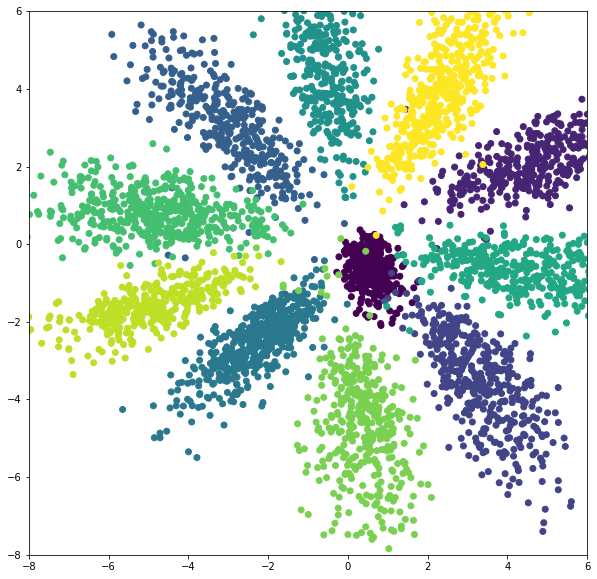

In [210]:
embed_spks = [k.split("/")[0] for k in dvectors.keys()]
unique_spks = pd.Series(embed_spks).unique().tolist()
embed_labels = [unique_spks.index(v) for v in embed_spks]
embed_points = np.array([v for v in dvectors.values()])

plt.figure(figsize=(10,10))
plt.xlim([-8,6])
plt.ylim([-8,6])
plt.scatter(embed_points[:,0], embed_points[:,1], c=embed_labels)
plt.show()

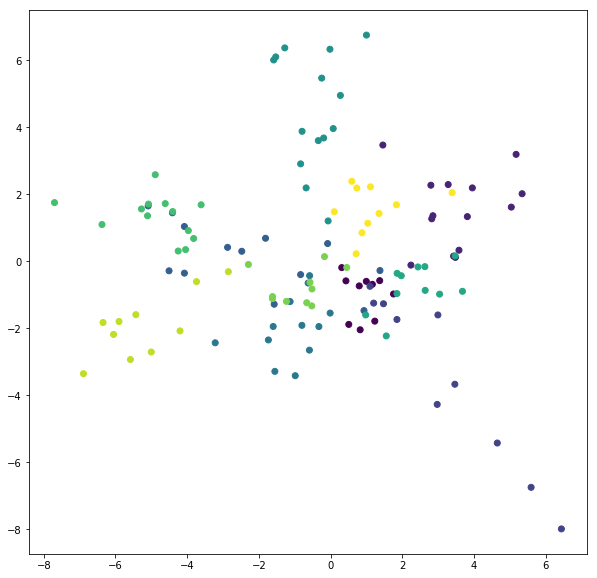

In [201]:
embed_spks = [k.split("/")[0] for k in dvectors.keys()]
unique_spks = pd.Series(embed_spks).unique().tolist()

embed_labels = [unique_spks.index(v) for v in embed_spks]
embed_points = np.array([v for v in dvectors.values()])

plt.figure(figsize=(10,10))
plt.scatter(embed_points[:,0], embed_points[:,1], c=embed_labels)
plt.show()

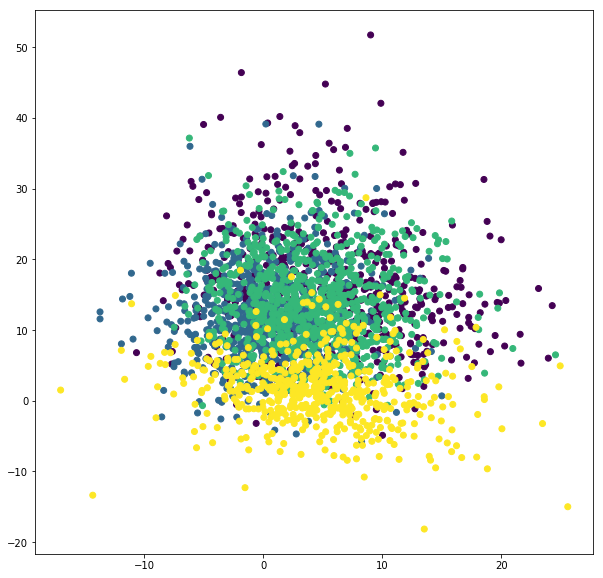

In [203]:
dvectors = pickle.load(open("../models/voxc_11spks/Conv4_softmax/fbank_300f_300f_v00/test_dvectors.pkl", "rb"))
embed_spks = [k.split("/")[0] for k in dvectors.keys()]
unique_spks = pd.Series(embed_spks).unique().tolist()
embed_labels = [unique_spks.index(v) for v in embed_spks]
embed_points = np.array([v for v in dvectors.values()])

plt.figure(figsize=(10,10))
plt.scatter(embed_points[:,0], embed_points[:,1], c=embed_labels)
plt.show()

In [133]:
from sklearn import preprocessing, cluster

embed_labels = np.array(embed_labels)

In [175]:
emb_per_spk = embed_points[np.where(embed_labels==4)]
emb_norm = preprocessing.normalize(emb_per_spk)

In [176]:
kmeans = cluster.KMeans(3).fit(emb_norm)

In [177]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

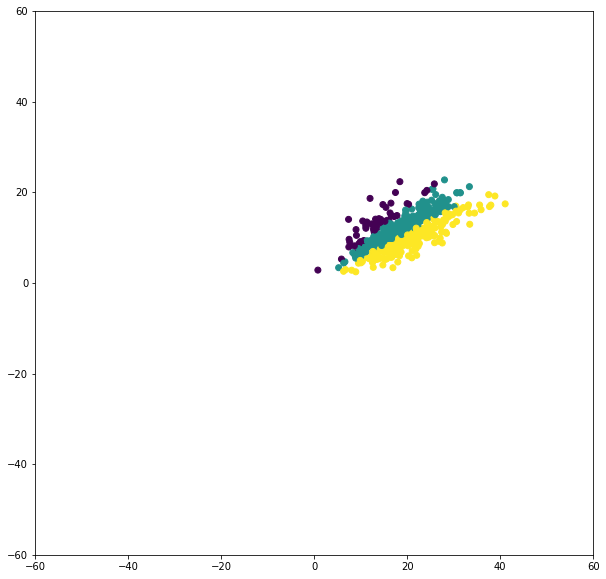

In [178]:
plt.figure(figsize=(10,10))
plt.scatter(emb_per_spk[:,0], emb_per_spk[:,1], c=kmeans.labels_)
plt.xlim(-60, 60)
plt.ylim(-60, 60)
plt.show()

### Conv4 + Angular

In [188]:
dvectors = pickle.load(open("../models/voxc_11spks/Conv4_angular/fbank_300f_300f_v00/train_dvectors.pkl", "rb"))

In [189]:
val_set = si_df[si_df.set != 1].index.tolist()
dvectors = {k:v for k,v in dvectors.items() if k in val_set}

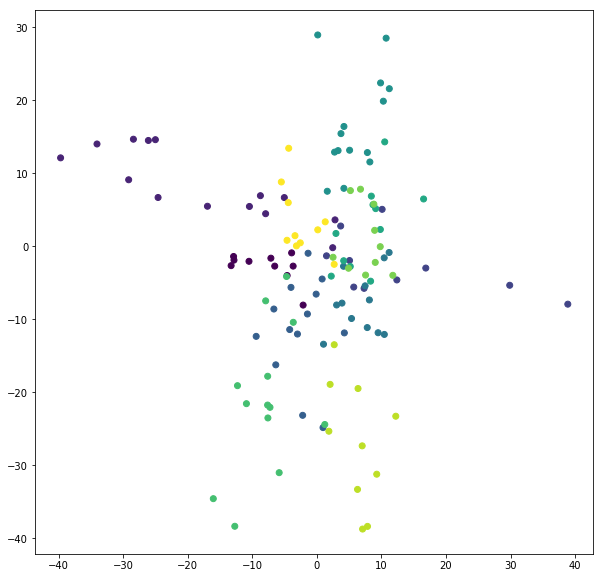

In [190]:
embed_spks = [k.split("/")[0] for k in dvectors.keys()]
unique_spks = pd.Series(embed_spks).unique().tolist()
embed_labels = [unique_spks.index(v) for v in embed_spks]
embed_points = np.array([v for v in dvectors.values()])

plt.figure(figsize=(10,10))
plt.scatter(embed_points[:,0], embed_points[:,1], c=embed_labels)
plt.show()

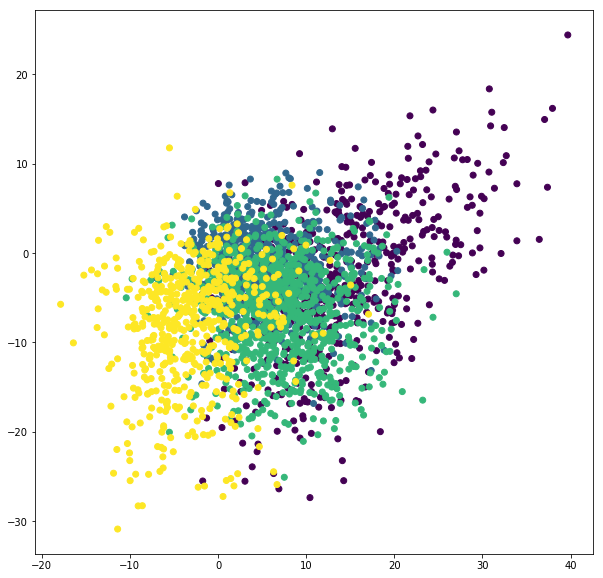

In [111]:
dvectors = pickle.load(open("../models/voxc_11spks/Conv4_angular/fbank_300f_300f_v00/test_dvectors.pkl", "rb"))
embed_spks = [k.split("/")[0] for k in dvectors.keys()]
unique_spks = pd.Series(embed_spks).unique().tolist()
embed_labels = [unique_spks.index(v) for v in embed_spks]
embed_points = np.array([v for v in dvectors.values()])

plt.figure(figsize=(10,10))
plt.scatter(embed_points[:,0], embed_points[:,1], c=embed_labels)
plt.show()